## 1. Compréhension du problème et des données

Le dataset Home Credit Default Risk vise à prédire la probabilité de défaut de paiement d’un client.
La variable cible est :
- TARGET = 1 : client en défaut de paiement
- TARGET = 0 : client sans défaut

L’enjeu métier est de limiter le risque de crédit tout en évitant de refuser des clients solvables.
Une mauvaise classification peut entraîner :
- Faux négatif : perte financière
- Faux positif : perte d’opportunité commerciale


In [4]:
import pandas as pd 
df= pd.read_csv("application_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape
df.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
df["TARGET"].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

In [20]:
missing_values=df.isnull().mean().sort_values(ascending=False)
missing_values

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
                              ...   
FLAG_DOCUMENT_16            0.000000
FLAG_DOCUMENT_15            0.000000
FLAG_DOCUMENT_14            0.000000
FLAG_DOCUMENT_20            0.000000
FLAG_DOCUMENT_21            0.000000
Length: 122, dtype: float64

In [21]:
missing_values[missing_values > 0.3]


COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
COMMONAREA_MEDI                 0.698723
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

## 2. Analyse des variables financières

### Distribution du revenu total (AMT_INCOME_TOTAL)


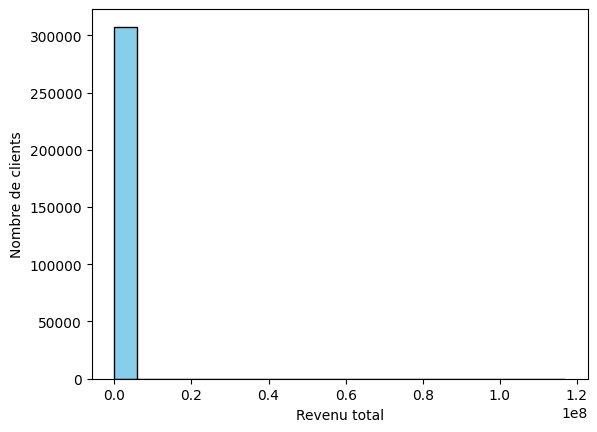

In [43]:
import matplotlib.pyplot  as plt

plt.hist(df["AMT_INCOME_TOTAL"], bins=20,color='skyblue', edgecolor='black')
plt.xlabel("Revenu total")
plt.ylabel("Nombre de clients")
plt.show()


On observe une distribution fortement asymétrique à droite.
La majorité des clients ont un revenu relativement faible, tandis que quelques valeurs extrêmes
correspondent à des revenus très élevés.

Cette dispersion importante suggère la présence d’outliers et justifie l’utilisation
de transformations (ex : logarithme) lors de la phase de feature engineering.


In [29]:
df["AMT_INCOME_TOTAL"]

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

### Distribution du montant du crédit (AMT_CREDIT)


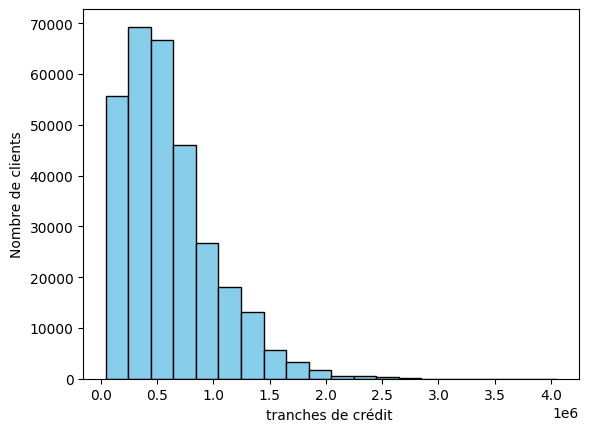

In [50]:
plt.hist(df["AMT_CREDIT"], bins=20,color='skyblue', edgecolor='black')
plt.xlabel("tranches de crédit ")
plt.ylabel("Nombre de clients")
plt.show()



La distribution du montant du crédit est également asymétrique, avec une majorité
de crédits de faible à moyen montant et quelques prêts très élevés.

Cela reflète un comportement bancaire classique et renforce l’intérêt de ratios
entre le crédit et le revenu du client.


In [51]:
import numpy as np


corr_target = (
    df.select_dtypes(include=np.number)
      .corr()["TARGET"]
      .sort_values(ascending=False)
)

corr_target.head(10),corr_target.tail(10)


(TARGET                         1.000000
 DAYS_BIRTH                     0.078239
 REGION_RATING_CLIENT_W_CITY    0.060893
 REGION_RATING_CLIENT           0.058899
 DAYS_LAST_PHONE_CHANGE         0.055218
 DAYS_ID_PUBLISH                0.051457
 REG_CITY_NOT_WORK_CITY         0.050994
 FLAG_EMP_PHONE                 0.045982
 REG_CITY_NOT_LIVE_CITY         0.044395
 FLAG_DOCUMENT_3                0.044346
 Name: TARGET, dtype: float64,
 ELEVATORS_AVG                -0.034199
 REGION_POPULATION_RELATIVE   -0.037227
 AMT_GOODS_PRICE              -0.039645
 FLOORSMAX_MODE               -0.043226
 FLOORSMAX_MEDI               -0.043768
 FLOORSMAX_AVG                -0.044003
 DAYS_EMPLOYED                -0.044932
 EXT_SOURCE_1                 -0.155317
 EXT_SOURCE_2                 -0.160472
 EXT_SOURCE_3                 -0.178919
 Name: TARGET, dtype: float64)

### Analyse des corrélations avec la variable cible

Les corrélations linéaires entre les variables numériques et la variable cible
sont globalement faibles, ce qui est typique des problématiques de scoring crédit.

Certaines variables se distinguent néanmoins :
- les variables EXT_SOURCE présentent une corrélation négative plus marquée,
  indiquant qu’un meilleur score externe est associé à un risque de défaut plus faible ;
- les variables liées à la stabilité personnelle et professionnelle
  (ancienneté, région, mobilité) montrent une corrélation positive modérée avec le défaut.

Ces résultats suggèrent que le risque de crédit dépend de relations complexes et non linéaires,
ce qui justifie l’utilisation de modèles avancés tels que les arbres de décision
ou les méthodes de boosting.


# NETTOYAGE & FEATURE ENGINEERING

In [ ]:
df = df.drop(columns=["SK_ID_CURR"])

In [58]:
df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)


## Création des FEATURES CLÉS

### Ratios financiers

In [59]:
df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / df["AMT_INCOME_TOTAL"]
df["ANNUITY_INCOME_RATIO"] = df["AMT_ANNUITY"] / df["AMT_INCOME_TOTAL"]
df["CREDIT_GOODS_RATIO"] = df["AMT_CREDIT"] / df["AMT_GOODS_PRICE"]


Variables d’âge et de stabilité

In [64]:
df["AGE_YEARS"] = -df["DAYS_BIRTH"] / 365
df["EMPLOYED_YEARS"] = -df["DAYS_EMPLOYED"] / 365


In [65]:
df["AGE_YEARS"]

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: AGE_YEARS, Length: 307511, dtype: float64

Historique de demandes de crédit

In [66]:
bureau_cols = [
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR"
]
df["TOTAL_CREDIT_REQUESTS"] = df[bureau_cols].sum(axis=1)


In [67]:
df["TOTAL_CREDIT_REQUESTS"]

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    3.0
307509    0.0
307510    3.0
Name: TOTAL_CREDIT_REQUESTS, Length: 307511, dtype: float64

Plus de demandes → signal de stress financier.

## Gestion des valeurs manquantes

In [69]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [70]:
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("Unknown")


## Encodage des variables catégorielles


In [71]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [74]:
df_encoded.shape
df_encoded.isnull().sum()


(307511, 241)

In [83]:
print("Shape du dataset avant encodage :", df.shape)
print("Shape du dataset final encodé :", df_encoded.shape)


Shape du dataset avant encodage : (307511, 127)
Shape du dataset final encodé : (307511, 241)


In [84]:
df_encoded

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Unknown,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Unknown,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,False,False,False,False,False,True,False,False,False,False
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,False,False,False,False,False,False,True,False,True,False
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,False,False,False,False,False,False,True,False,True,False
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236.0,-8456.0,...,False,False,False,False,False,True,False,False,False,False
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,-1648.0,-4388.0,...,False,False,False,False,False,True,False,False,False,False
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921.0,-6737.0,...,False,False,False,False,True,False,False,False,False,False
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786.0,-2562.0,...,False,False,False,False,False,True,False,False,False,False


# MODÉLISATION (BASELINE)

Séparer X et y.

In [85]:
X = df_encoded.drop(columns=["TARGET"])
y = df_encoded["TARGET"]
X.shape, y.shape


((307511, 240), (307511,))

Train / Test split

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train.shape, X_test.shape


((246008, 240), (61503, 240))

Modèle baseline : Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [88]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

Évaluation

In [89]:
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix
)

roc_auc = roc_auc_score(y_test, y_proba)
roc_auc


np.float64(0.6312723145288447)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     56538
           1       0.12      0.58      0.20      4965

    accuracy                           0.62     61503
   macro avg       0.53      0.60      0.47     61503
weighted avg       0.88      0.62      0.71     61503



In [91]:
confusion_matrix(y_test, y_pred)


array([[35318, 21220],
       [ 2108,  2857]])

## MODÈLES AVANCÉS

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200, #plus il y'a d'arbre meilleur perf 
    max_depth=10,#Profondeur maximale de chaque arbre.
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1#accélérer l’entraînement
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [93]:
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
roc_auc_rf


np.float64(0.7343507278317425)

In [94]:
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)


              precision    recall  f1-score   support

           0       0.95      0.73      0.83     56538
           1       0.17      0.60      0.26      4965

    accuracy                           0.72     61503
   macro avg       0.56      0.67      0.55     61503
weighted avg       0.89      0.72      0.78     61503



array([[41499, 15039],
       [ 1974,  2991]])

## XGBoost

In [95]:
pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.4 MB/s eta 0:00:30
    --------------------------------------- 1.3/72.0 MB 2.4 MB/s eta 0:00:30
   - -------------------------------------- 1.8/72.0 MB 2.4 MB/s eta 0:00:30
   - -------------------------------------- 2.4/72.0 MB 2.4 MB/s eta 0:00:30
   - -------------------------------------- 2.9/72.0 MB 2.4 MB/s eta 0:00:29
   - -------------------------------------- 3.4/72.0 MB 2.4 MB/s eta 0:00:29
   -- ------------------------------------- 3.7/72.0 MB 2.4 MB/s eta 0:00:29
   -- ------------------------------------- 4.2/72.0 MB 2.4 MB/s eta 0:00:29
   -- ------------------------------------- 4.7/72.0 MB 2.4 MB/s eta 0:00:29
   -- ------------------------------------- 5.2/72.0 MB 2.4 MB/s eta 0:00:28
   --- ------------------------------------ 5.8/72.0 MB 2.4 MB/s eta 0:00:28
   --- ------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, ...)

In [97]:
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb.predict(X_test)

roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
roc_auc_xgb


np.float64(0.761881527550186)

In [98]:
print(classification_report(y_test, y_pred_xgb))
confusion_matrix(y_test, y_pred_xgb)


              precision    recall  f1-score   support

           0       0.96      0.71      0.82     56538
           1       0.17      0.67      0.27      4965

    accuracy                           0.71     61503
   macro avg       0.57      0.69      0.55     61503
weighted avg       0.90      0.71      0.78     61503



array([[40411, 16127],
       [ 1621,  3344]])

In [99]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC_AUC": [roc_auc, roc_auc_rf, roc_auc_xgb]
})

results


,Model,ROC_AUC
0,Logistic Regression,0.631272
1,Random Forest,0.734351
2,XGBoost,0.761882


Les modèles non linéaires surpassent nettement la régression logistique,
confirmant que le risque de défaut dépend de relations complexes entre les variables.

XGBoost obtient la meilleure performance globale, ce qui en fait le modèle
le plus adapté pour cette problématique de scoring crédit.


## SHAP

In [103]:
pip install shap

  Using cached shap-0.50.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.63.1-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.46.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached shap-0.50.0-cp311-cp311-win_amd64.whl (547 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.63.1-cp311-cp311-win_amd64.whl (2.7 MB)
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? et

ERROR: Could not install packages due to an OSError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'c:\\Users\\log\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\numba\\tests\\npyufunc\\ufuncbuilding_usecases.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
import shap
import numpy as np


In [107]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)


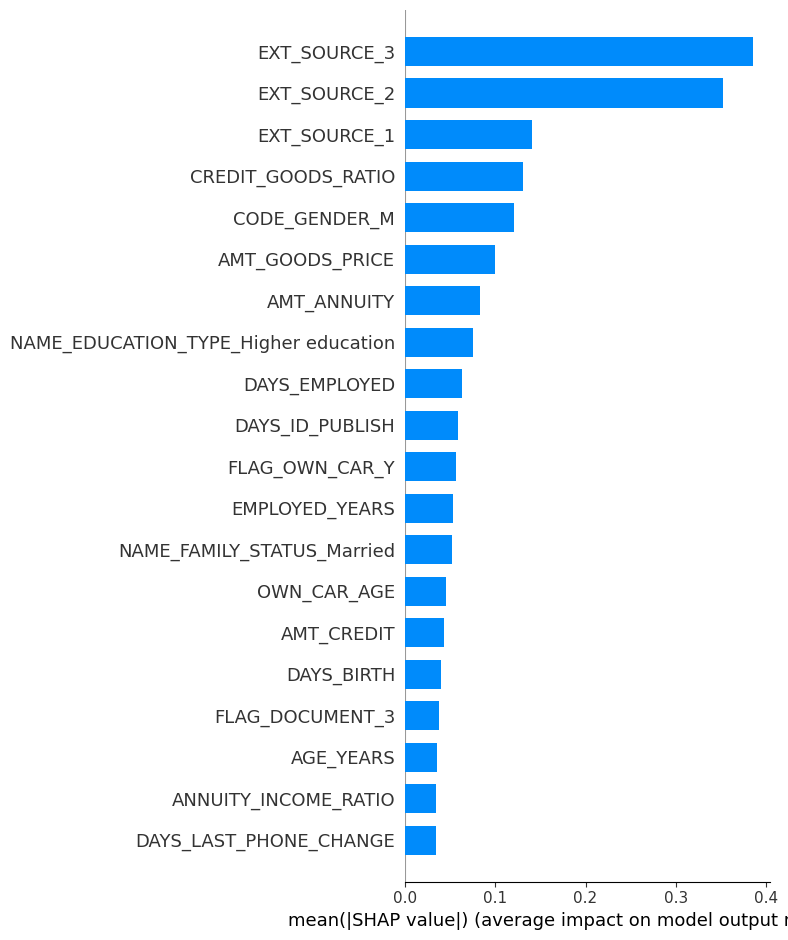

In [108]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


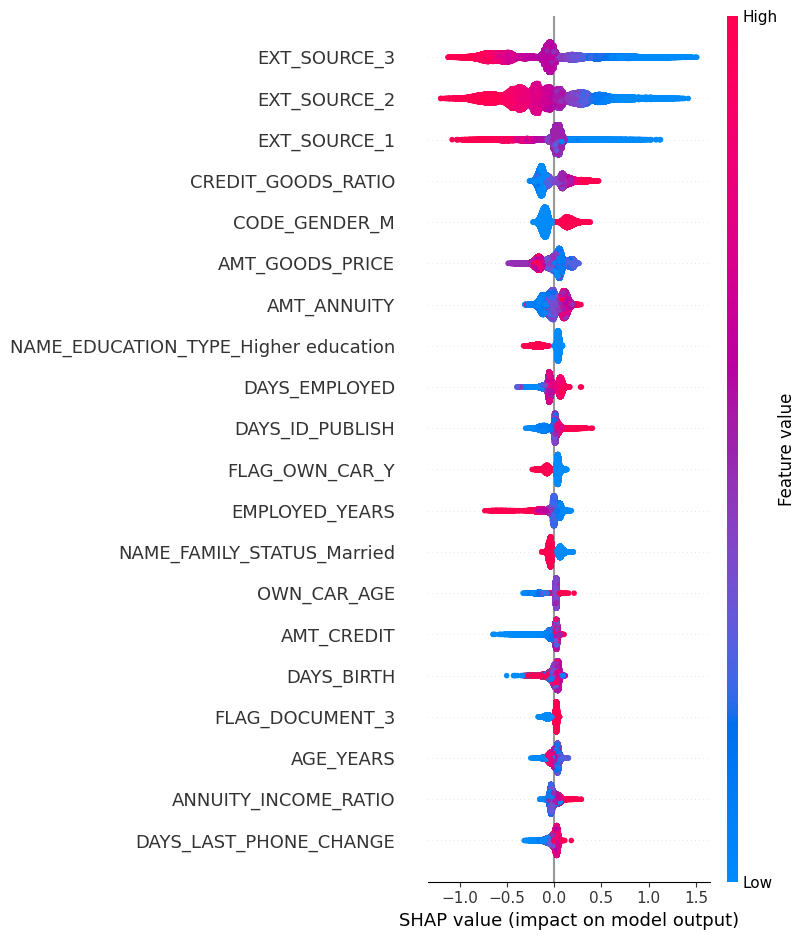

In [109]:
shap.summary_plot(shap_values, X_test)


L’analyse SHAP met en évidence que les décisions du modèle XGBoost
sont principalement guidées par les scores externes de solvabilité (EXT_SOURCE),
les ratios financiers traduisant la pression de remboursement,
ainsi que des indicateurs de stabilité personnelle et professionnelle.

Les variables présentant des valeurs élevées associées à une meilleure solvabilité
réduisent significativement la probabilité de défaut, tandis que des ratios de crédit
élevés ou une instabilité professionnelle augmentent le risque.

Ces résultats confirment la cohérence du modèle avec les pratiques de scoring
crédit utilisées en milieu bancaire et renforcent sa crédibilité opérationnelle.
